# OptionBasics
#### Call and Put Payoffs


I'm sorry for the oversight. The symbols you're seeing usually indicate a character encoding issue. For simplicity, let's avoid any non-standard characters.

Here's a revised version that should work seamlessly:

1. Call and Put Options
Call Option:
A call option gives the holder the right, but not the obligation, to buy an underlying asset at a specified strike price within a certain period of time. Investors buy calls when they believe the price of the underlying asset will increase.

Put Option:
A put option gives the holder the right, but not the obligation, to sell an underlying asset at a specified strike price within a certain period of time. Investors buy puts when they believe the price of the underlying asset will decrease.

2. Their Payoffs
Call Option Payoff:
The payoff from a call option is determined by the stock price at expiry relative to the strike price of the option. If the stock price at expiry, denoted as 
$ \ S_T $, is greater than the strike price, denoted as $ K $, the payoff is $ S_T - K $

​ Otherwise, the payoff is zero. After considering the premium, denoted as 
$ P $, paid for the option, the net payoff is:
Payoff:
$
Payoff = max(S_T−K,0)−P $

Put Option Payoff:
The payoff from a put option is determined by the stock price at expiry relative to the strike price of the option. If the stock price at expiry, 
$ S_T $, is less than the strike price, $ K $, the payoff is $ K−S_T $ 

​
 . Otherwise, the payoff is zero. After considering the premium, 
$ P $, paid for the option, the net payoff is:
$ \text{Payoff} = \max(S_T - K, 0) - P $


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define a function to calculate the payoff for a European call option
def call_payoff(sT, strike_price, premium):
    # If the stock price at expiry is greater than the strike price, the payoff is (sT - strike_price)
    # Otherwise, the payoff is 0. The premium is then subtracted from the payoff.
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

# Define a function to calculate the payoff for a European put option
def put_payoff(sT, strike_price, premium):
    # If the stock price at expiry is less than the strike price, the payoff is (strike_price - sT)
    # Otherwise, the payoff is 0. The premium is then subtracted from the payoff.
    return np.where(sT < strike_price, strike_price - sT, 0) - premium



In [8]:
# Define parameters for the options and the range of stock prices at expiry
sT = np.arange(50,150,1)  # Stock price at expiry ranging from 50 to 150 in increments of 1
strike_price = 100  # Strike price for the options
premium = 10  # Premium paid for the options

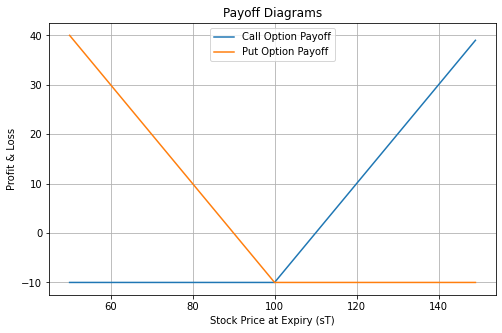

In [9]:
# Set up the plot
plt.figure(figsize=(8,5))
# Plot the call option payoff against stock prices at expiry
plt.plot(sT, call_payoff(sT, strike_price, premium), label='Call Option Payoff')
# Plot the put option payoff against stock prices at expiry
plt.plot(sT, put_payoff(sT, strike_price, premium), label='Put Option Payoff')

# Set the x and y axis labels
plt.xlabel('Stock Price at Expiry (sT)')
plt.ylabel('Profit & Loss')

# Add a legend to differentiate between call and put payoffs
plt.legend()

# Set the title for the plot
plt.title('Payoff Diagrams')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()


# Introduction to Volatility:



Volatility is central to options trading, representing the variability or dispersion of an asset's price. A higher volatility indicates the potential for wider price fluctuations in a short time frame, influencing the option's price.

---

#### Definition of Volatility

**Volatility** is a statistical metric quantifying the dispersion of returns for a given asset or market index. In the context of options trading, it signifies the probability of price changes in the underlying asset. More volatile assets can undergo significant price shifts in a short duration, increasing the chances that the option will end in-the-money.

---

Types of Volatility

Options trading primarily considers two forms of volatility:

- **Historical (or Realized) Volatility:** This reflects past price fluctuations of the underlying asset, quantifying the annualized standard deviation of daily returns over a specific period. It offers a retrospective view based on actual past price movements.

- **Implied Volatility (IV):** Extracted from an option's current market price, IV embodies the market's future expectations of asset price volatility. Contrary to historical volatility, IV is forward-looking, providing insight into the market's anticipated volatility over the option's duration.

---

Impact of Volatility on Option Pricing

Volatility plays a pivotal role in determining an option's price:

- **Higher Volatility -> Higher Option Premium:** A volatile underlying asset can sway into a beneficial position for the option holder, elevating the option's value and price.

- **Lower Volatility -> Lower Option Premium:** A stable, less volatile asset reduces the likelihood of the option finishing in-the-money, diminishing its value.

Both call and put options are sensitive to these dynamics. An option's "Vega" captures its sensitivity to volatility changes. Typically, as volatility increases, option prices rise, and as it decreases, prices fall, assuming other factors are constant.

---



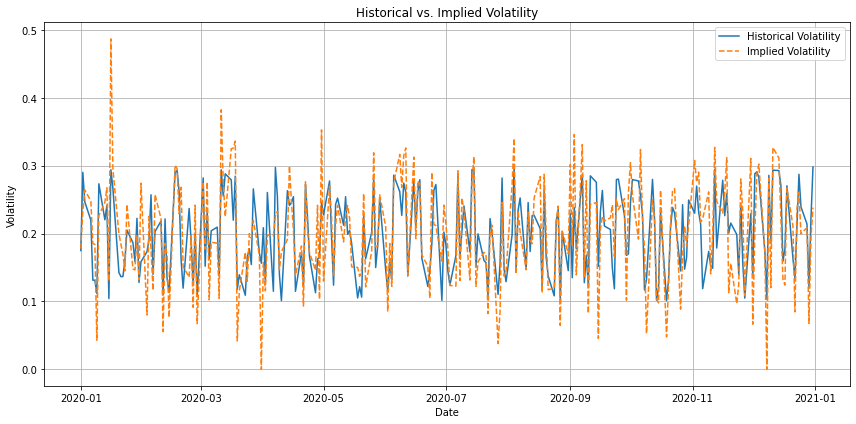

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy date range
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='B')

# Generate random data for historical and implied volatility
np.random.seed(42)  # for reproducibility
historical_volatility = np.random.uniform(0.1, 0.3, size=(len(date_rng),))
implied_volatility = historical_volatility + np.random.normal(0, 0.05, size=(len(date_rng),))

# Ensure that implied volatility remains positive
implied_volatility = np.clip(implied_volatility, 0, None)

# Create a DataFrame
df = pd.DataFrame(date_rng, columns=['date'])
df['Historical Volatility'] = historical_volatility
df['Implied Volatility'] = implied_volatility
df.set_index('date', inplace=True)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(df['Historical Volatility'], label='Historical Volatility')
plt.plot(df['Implied Volatility'], label='Implied Volatility', linestyle='--')
plt.title('Historical vs. Implied Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

## Calculating Vega

**Vega** is a measure of an option's sensitivity to changes in the volatility of the underlying asset. It indicates how much the option's price will change given a 1% change in implied volatility, all other factors remaining constant.

**Mathematically**:

$ \ \text{Vega} = \frac{\partial V}{\partial \sigma} \ $

In the **Black-Scholes model** context for European-style options, Vega is defined as:

$ \ \text{Vega} = S_0 \times \sqrt{T} \times N'(d_1) \ $

Where:
- \( S_0 \) is the current stock price.
- \( T \) is the time to expiration (in years).
- \( N'(d_1) \) is the derivative (or density function) of the standard normal cumulative distribution function with respect to \( d_1 \).
- \( d_1 \) is:

$  d_1 = \frac{\ln \left( \frac{S_0}{K} \right) + \left( r + \frac{\sigma^2}{2} \right)T}{\sigma \sqrt{T}} \ $

With:
- \( K \) representing the strike price.
- \( r \) the risk-free rate.
-  ( $ \sigma $ \) the implied volatility.



In [3]:
import numpy as np
from scipy.stats import norm

def black_scholes_vega(S0, K, T, r, sigma):
    """Compute Vega for European option in Black-Scholes model."""
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    vega = S0 * np.sqrt(T) * norm.pdf(d1)
    return vega

# Example usage:
S0 = 100          # Current stock price
K = 100           # Strike price
T = 1             # Time to expiration in years
r = 0.05          # Risk-free rate
sigma = 0.2       # Implied volatility

vega_value = black_scholes_vega(S0, K, T, r, sigma)
print(f"Vega: {vega_value:.2f}")


Vega: 37.52
